<a href="https://colab.research.google.com/github/NIP-Data-Computation/show-and-tell/blob/master/piercel_dnc_brownbag2_demo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importing necessary packages

In [9]:
# to get a sample dataset to work on, implement support vector 
# machines, and calculate performance metrics
from sklearn import datasets, svm, metrics

# to facilitate splitting, training, and testing
from sklearn.model_selection import train_test_split

# to visualize
import matplotlib.pyplot as plt

Loading a sample dataset to work on


In [10]:
# obtain sample breast cancer data
cancer = datasets.load_breast_cancer()

# display data features and labels (target variable)
print("Features: ", cancer.feature_names)
print("Labels: ", cancer.target_names)

# get to know the shape of the dataset (number of 
# samples and number of features)
print("Number of samples:", cancer.data.shape[0])
print("Number of features:", cancer.data.shape[1])

Features:  ['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']
Labels:  ['malignant' 'benign']
Number of samples: 569
Number of features: 30


Taking a subset of the original dataset (using two features)

In [11]:
# take a subset of original dataset
cancer_subfeatures = cancer.data[:, :2]

Splitting input data to training and test sets

In [12]:
# facilitate training and testing
x_train, x_test, y_train, y_test = train_test_split(cancer_subfeatures,
                                                    cancer.target,
                                                    test_size = 0.2,
                                                    random_state = 10)

Creating an SVM classifier and making it learn using the training set

In [13]:
# make a support vector machine classifier
clf = svm.SVC(kernel = 'linear')

# train the model using the allocated training sets
clf.fit(x_train, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

Using our trained classifier on the test set and calculating its performance

In [14]:
# predict the response using our test dataset
y_pred = clf.predict(x_test)

print("accuracy:", metrics.accuracy_score(y_test, y_pred))
print("precision:", metrics.precision_score(y_test, y_pred))
print("recall:", metrics.recall_score(y_test, y_pred))
print("f1_score:", metrics.f1_score(y_test, y_pred))

accuracy: 0.8508771929824561
precision: 0.881578947368421
recall: 0.8933333333333333
f1_score: 0.8874172185430463


Visualizing the feature datapoints used

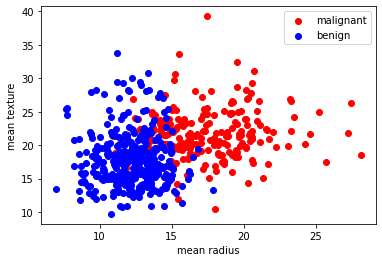

In [15]:
# plot feature points
cancer_mal = cancer_subfeatures[cancer.target == 0]
cancer_ben = cancer_subfeatures[cancer.target == 1]

plt.scatter(cancer_mal[:,0], 
            cancer_mal[:,1], 
            c='r',
            label=cancer.target_names[0])

plt.scatter(cancer_ben[:,0], 
            cancer_ben[:,1], 
            c='b',
            label=cancer.target_names[1])

plt.xlabel(cancer.feature_names[0])
plt.ylabel(cancer.feature_names[1])
plt.legend()
plt.show()